In [ ]:
import pandas as pd
import numpy as np
# Create a date range for the past 5 years with hourly frequency
date_rng = pd.date_range(start='2018-09-10', end='2023-09-10', freq='H')
# Create a sample dataframe
df = pd.DataFrame(date_rng, columns=['date'])
df = df.set_index('date')
df['Region_1'] = np.random.randint(0, 1000, size=(len(date_rng)))
df['Region_2'] = np.random.randint(0, 1000, size=(len(date_rng)))
df['Region_3'] = np.random.randint(0, 1000, size=(len(date_rng)))
# Calculate the daily total for each region
daily_totals = df.resample('D').sum()
# Calculate the hourly percentage of the daily total for each region
for region in ['Region_1', 'Region_2', 'Region_3']:
    df[f'{region}_percentage'] = df[region] / df[region].resample('D').transform('sum')
# Display the first few rows of the dataframe
df.head()

In [ ]:
# Multiply the percentage columns by 100 to get the values in percentage format
for region in ['Region_1', 'Region_2', 'Region_3']:
    df[f'{region}_percentage'] = df[f'{region}_percentage'] * 100
# Display the first few rows of the dataframe after the update
df.head()

In [ ]:
# Define the time buckets
time_buckets = {
    'Jan-Feb': [1, 2],
    'Mar-May': [3, 4, 5],
    'Jun-Sep': [6, 7, 8, 9],
    'Oct-Dec': [10, 11, 12]
}
# Calculate the average percentage for each hour in each time bucket for each region
average_percentages = {}
for bucket, months in time_buckets.items():
    subset = df[df.index.month.isin(months)]
    hourly_avg = subset.groupby(subset.index.hour)[['Region_1_percentage', 'Region_2_percentage', 'Region_3_percentage']].mean()
    average_percentages[bucket] = hourly_avg
average_percentages['Jan-Feb'].head()

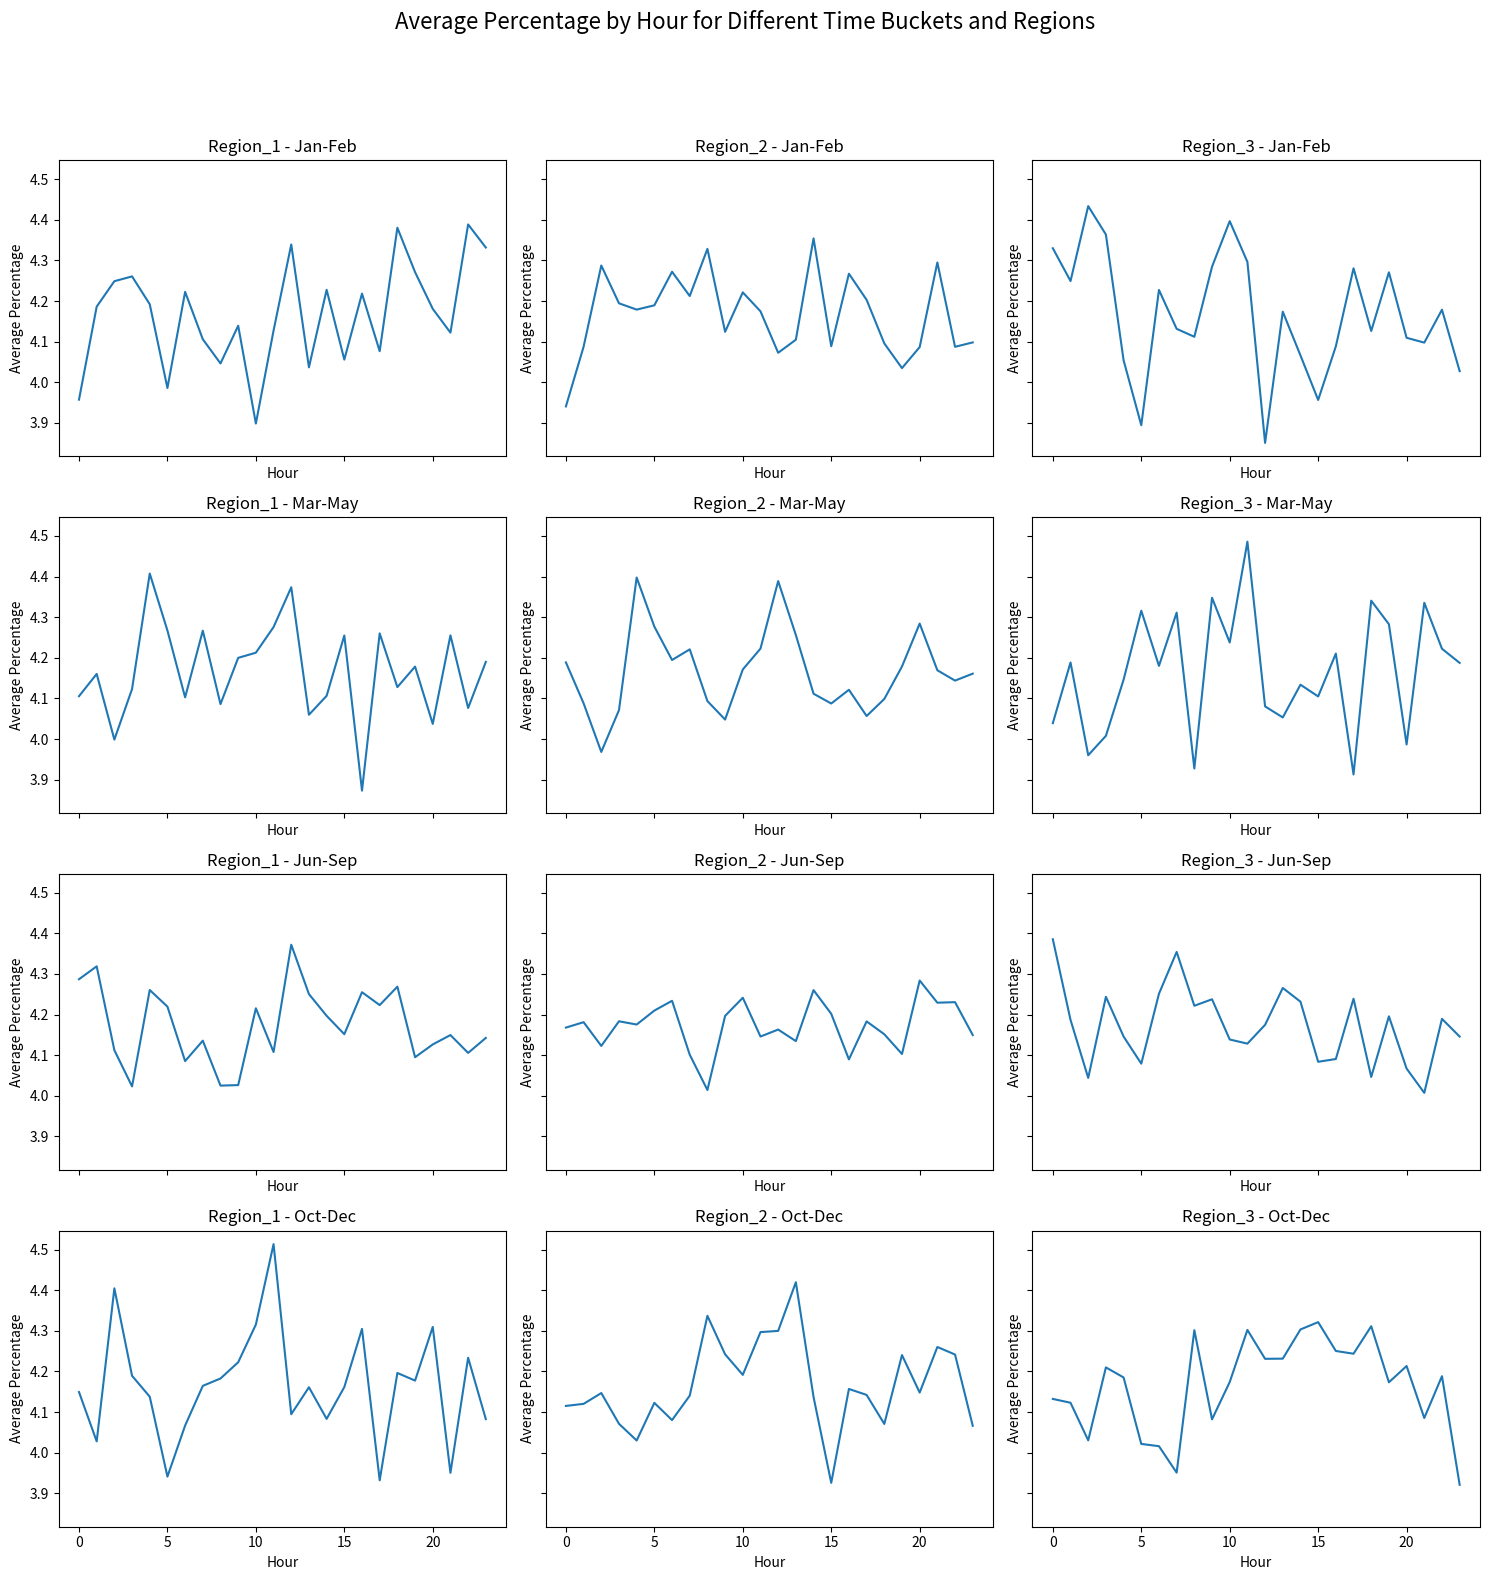

In [ ]:
import matplotlib.pyplot as plt
# Set up the figure and axes
fig, axs = plt.subplots(4, 3, figsize=(15, 15), sharex=True, sharey=True)
fig.suptitle('Average Percentage by Hour for Different Time Buckets and Regions', fontsize=16, y=1.05)
# Loop through each time bucket and region to plot the graphs
for i, (bucket, months) in enumerate(time_buckets.items()):
    for j, region in enumerate(['Region_1', 'Region_2', 'Region_3']):
        axs[i, j].plot(average_percentages[bucket].index, average_percentages[bucket][f'{region}_percentage'])
        axs[i, j].set_title(f'{region} - {bucket}')
        axs[i, j].set_xlabel('Hour')
        axs[i, j].set_ylabel('Average Percentage')
# Adjust layout
plt.tight_layout()
plt.show()

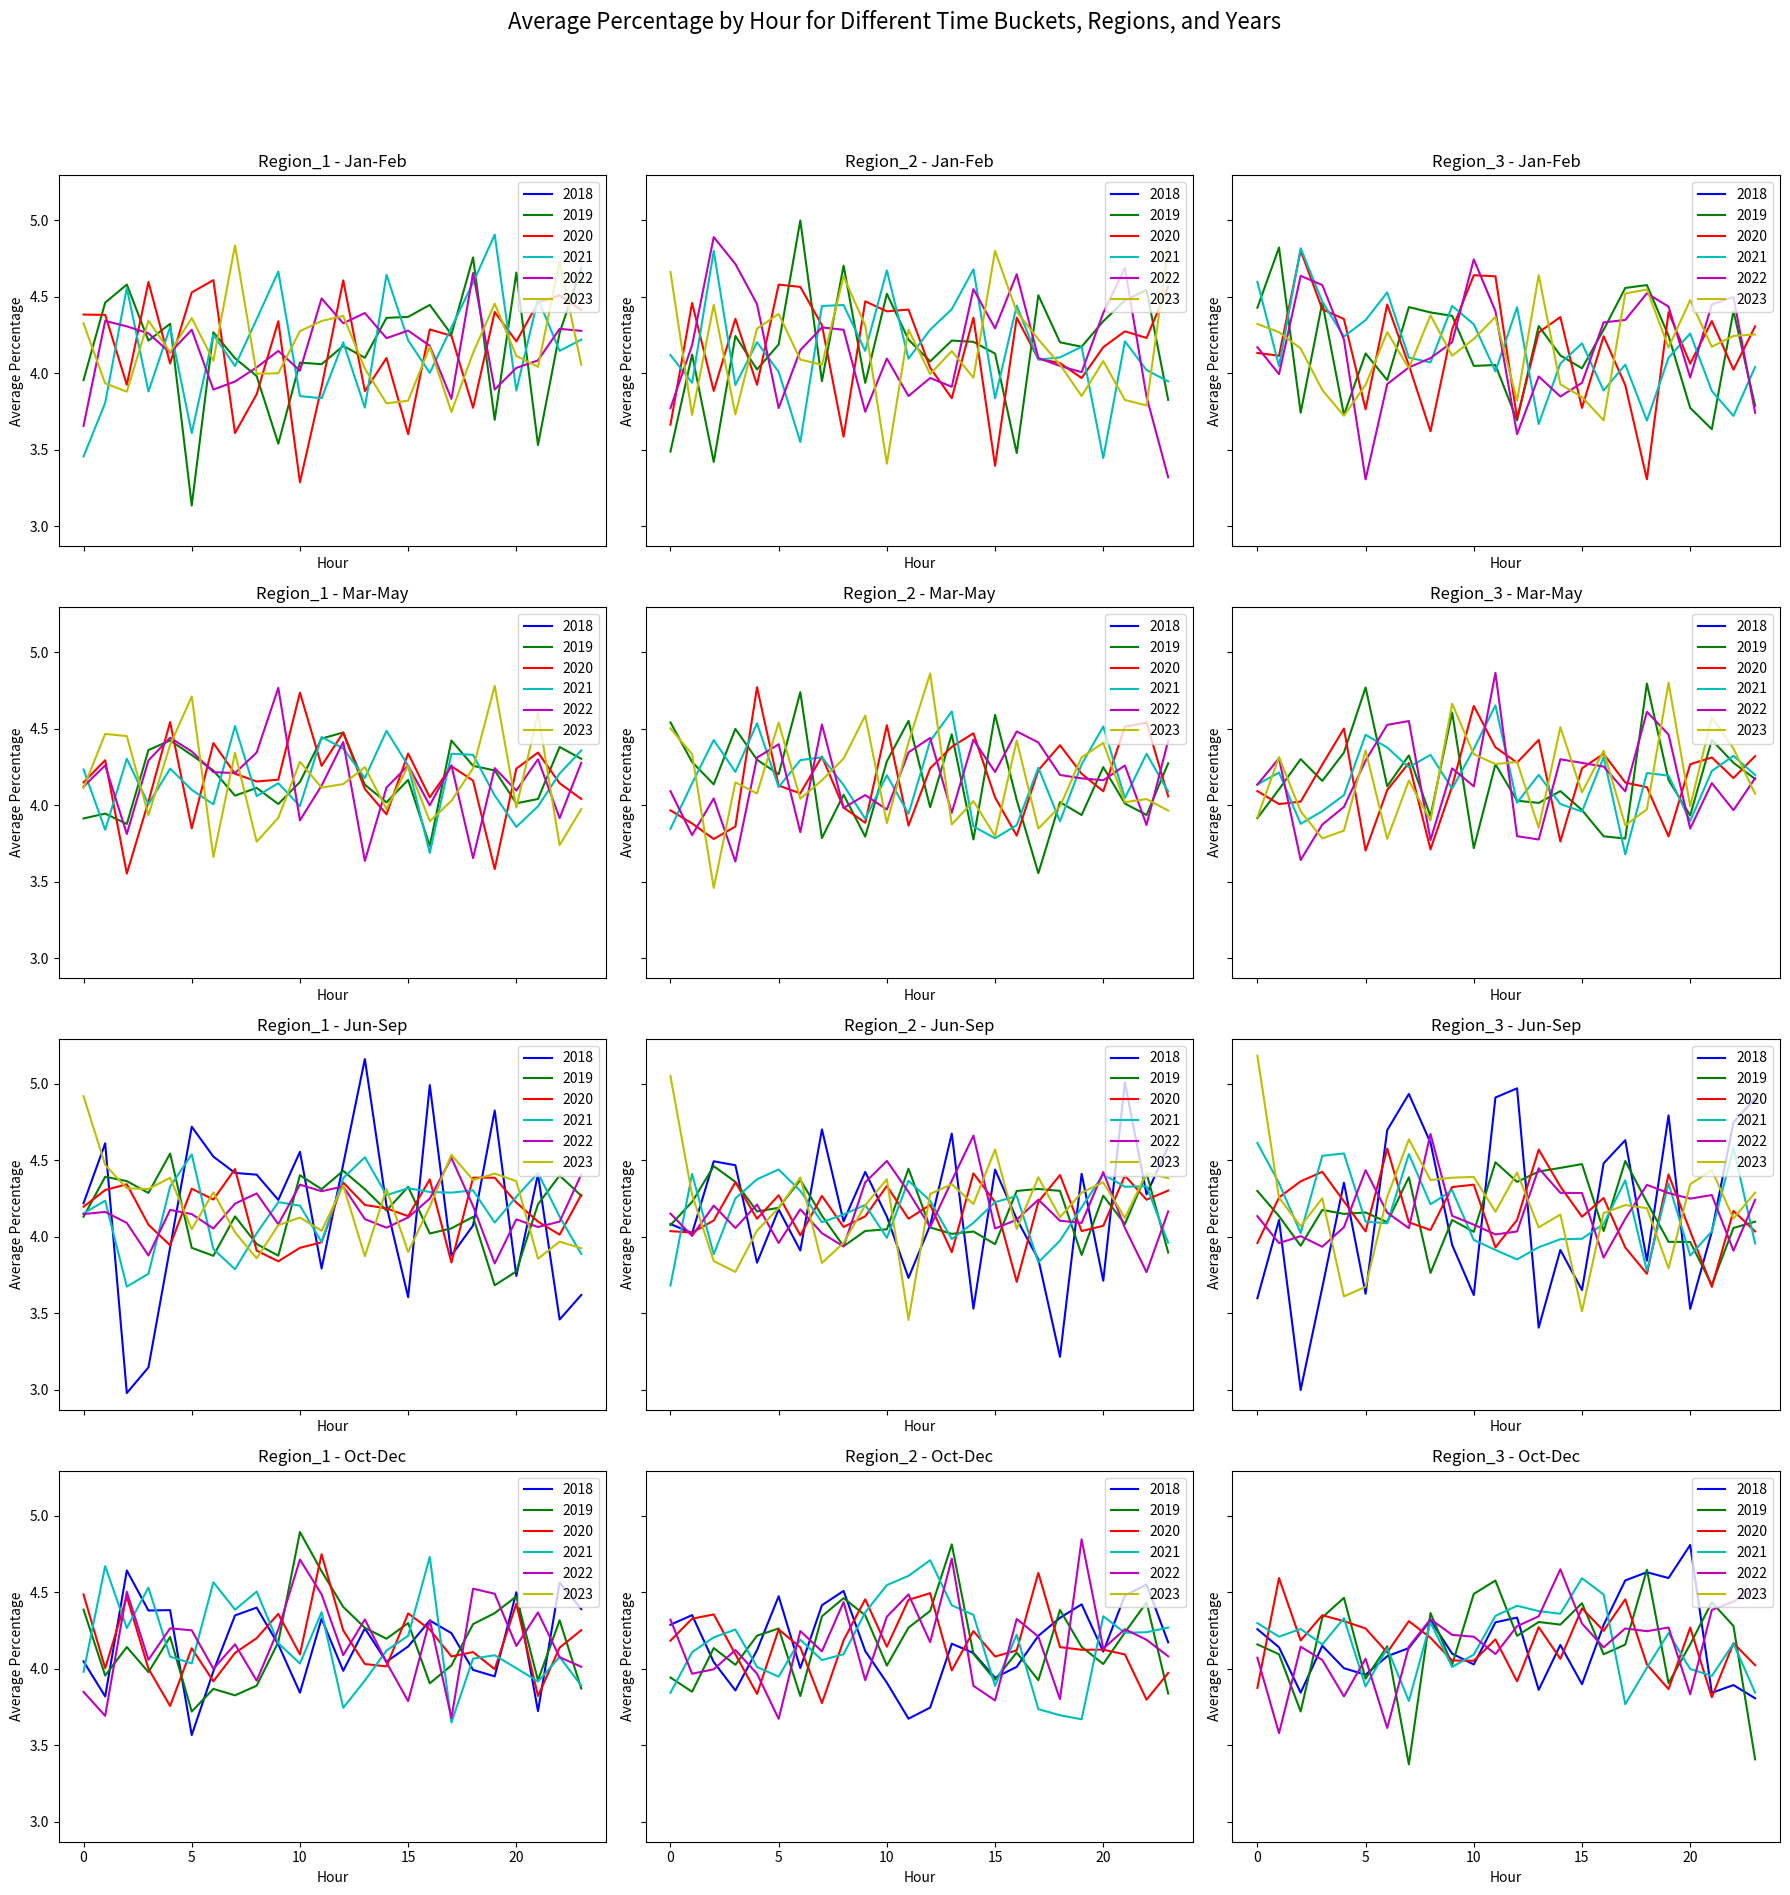

In [ ]:
# Set up the figure and axes
fig, axs = plt.subplots(4, 3, figsize=(18, 18), sharex=True, sharey=True)
fig.suptitle('Average Percentage by Hour for Different Time Buckets, Regions, and Years', fontsize=16, y=1.05)
# Define colors for each year
colors = {2018: 'b', 2019: 'g', 2020: 'r', 2021: 'c', 2022: 'm', 2023: 'y'}
# Loop through each time bucket and region to plot the graphs
for i, (bucket, months) in enumerate(time_buckets.items()):
    for j, region in enumerate(['Region_1', 'Region_2', 'Region_3']):
        for year, color in colors.items():
            subset = df[(df.index.year == year) & (df.index.month.isin(months))]
            hourly_avg = subset.groupby(subset.index.hour)[f'{region}_percentage'].mean()
            axs[i, j].plot(hourly_avg.index, hourly_avg, color=color, label=year)
        axs[i, j].set_title(f'{region} - {bucket}')
        axs[i, j].set_xlabel('Hour')
        axs[i, j].set_ylabel('Average Percentage')
        axs[i, j].legend(loc='upper right')
# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
!pip install -q bokeh

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
from bokeh.models import HoverTool

# Output to notebook
output_notebook()

# Set up the figure and axes
plots = []
for i, (bucket, months) in enumerate(time_buckets.items()):
    row = []
    for j, region in enumerate(['Region_1', 'Region_2', 'Region_3']):
        p = figure(width=250, height=250, title=f'{region} - {bucket}', x_axis_label='Hour', y_axis_label='Average Percentage')
        for year, color in colors.items():
            subset = df[(df.index.year == year) & (df.index.month.isin(months))]
            hourly_avg = subset.groupby(subset.index.hour)[f'{region}_percentage'].mean()
            p.line(hourly_avg.index, hourly_avg, color=color, legend_label=str(year), line_width=2)
            p.circle(hourly_avg.index, hourly_avg, color=color, fill_color='white', size=8)
        p.add_tools(HoverTool())
        row.append(p)
    plots.append(row)

# Display the grid of plots
grid = gridplot(plots)
show(grid)

In [ ]:
from bokeh.plotting import output_file

# Specify the output file
output_file('interactive_plots.html')

# Set up the figure and axes
plots = []
for i, (bucket, months) in enumerate(time_buckets.items()):
    row = []
    for j, region in enumerate(['Region_1', 'Region_2', 'Region_3']):
        p = figure(width=250, height=250, title=f'{region} - {bucket}', x_axis_label='Hour', y_axis_label='Average Percentage')
        for year, color in colors.items():
            subset = df[(df.index.year == year) & (df.index.month.isin(months))]
            hourly_avg = subset.groupby(subset.index.hour)[f'{region}_percentage'].mean()
            p.line(hourly_avg.index, hourly_avg, color=color, legend_label=str(year), line_width=2)
            p.circle(hourly_avg.index, hourly_avg, color=color, fill_color='white', size=8)
        hover = HoverTool()
        hover.tooltips = [
            ('Hour', '@x'),
            ('Average Percentage', '@y')
        ]
        p.add_tools(hover)
        row.append(p)
    plots.append(row)

# Display the grid of plots
grid = gridplot(plots)
show(grid)